In [1]:
import pandas as pd ; import networkx as nx ; import ast ; import matplotlib.pyplot as plt ; import numpy as np ;
import nltk ; from wordcloud import WordCloud, ImageColorGenerator ; from PIL import Image ; import urllib.request ;
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS ; from collections import Counter

In [2]:
df_characters = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/df_characters_with_attr_and_communities.csv")
df_characters = df_characters.drop('Unnamed: 0', axis=1)
df_episodes = pd.read_csv('https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/RaM_episodes.csv')
df_transcripts = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/transcripts/RickAndMortyScripts.csv")
df_nrc = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/NRC.csv")
df_nrc_01 = pd.read_csv('https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/lexicons/NRC_sentiment_lexicon.csv')

In [3]:
df_characters['degree'] = df_characters['in_degree'] + df_characters['out_degree']

In [4]:
#pd.set_option('display.max_rows', 550)

In [5]:
# df_characters[df_characters.Name.isin(['Rick Sanchez', 'Evil Rick Sanchez', 'Rick Sanchez (C-132)', 'Memory Rick', 'Rick Sanchez (Replacement Dimension)', 'Doofus Rick', 'Tiny Rick', 'Cronenberg Rick', 'Pickle_Rick_(character)', 'Toxic Rick'])]


In [6]:
# df_transcripts[df_transcripts.name.isin(['Rick Sanchez', 'Evil Rick Sanchez', 'Rick Sanchez (C-132)', 'Memory Rick', 'Rick Sanchez (Replacement Dimension)', 'Doofus Rick', 'Tiny Rick', 'Cronenberg Rick', 'Pickle_Rick_(character)', 'Toxic Rick'])]

In [7]:
df_transcripts["name"].replace({"Rick": "Rick Sanchez"}, inplace=True)
df_transcripts["name"].replace({"Evil Rick": "Evil Rick Sanchez"}, inplace=True)
df_transcripts["name"].replace({"Pickle Rick": "Pickle Rick (character)"}, inplace=True)
df_transcripts["name"].replace({"Morty": "Morty Smith"}, inplace=True)
df_transcripts["name"].replace({"Beth": "Beth Smith"}, inplace=True)
df_transcripts["name"].replace({"Jerry": "Jerry Smith"}, inplace=True)
df_transcripts["name"].replace({"Summer": "Summer Smith"}, inplace=True)

df_charLines = df_transcripts.groupby(['name'], as_index = False).agg({'line': ','.join})
characters_dialogue = df_charLines.set_index('name').T.to_dict('list') 


In [8]:
df_episode_transcript = df_transcripts.groupby(['season no.', 'episode no.', 'episode name'], as_index = False).agg({'line': ','.join})
df_episode_transcript

,season no.,episode no.,episode name,line
0,1,1,Pilot,Morty! You gotta come on. Jus'... you gotta co...
1,1,2,Lawnmower Dog,What? Why are you looking at me? You want to g...
2,1,3,Anatomy Park,"Last King Christmas last arrived!, In the Chr..."
3,1,4,M. Night Shaym-Aliens!,"T-t-t-this is just sloppy craftsmanship.,Hey, ..."
4,1,5,Meeseeks and Destroy,"Run!,*incoherent zombie noises*,Morty, do it! ..."
5,1,6,Rick Potion 9,"Principal Vagina here, don't let the name fool..."
6,1,8,Rixty Minutes,"Cynthia...,Oh, my God! No, no..!,I told you!,H..."
7,1,9,Something Ricked This Way Comes,"Hey Rick, I have to make a project for the sci..."
8,1,10,Close Rick-counters of the Rick Kind,"So dad, guess what tomorrow is...,Martin Luthe..."
9,1,11,Ricksy Business,"Bye, mom! Bye, dad!,Drive carefully!,Have fun,..."


In [9]:
df_episode_lines = df_transcripts.groupby(['season no.', 'episode no.', 'episode name'], as_index = False).agg({'line': ','.join})
df_episode_lines.line = df_episode_lines.line.apply(lambda x: remove_stopwords(x))

Episodes_dialogue = df_episode_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 
Episodes_dialogue

{(1,
  1,
  'Pilot'): ['Morty! You gotta come on. Jus\'... gotta come me.,What, Rick? What’s going on?,I got surprise you, Morty.,It\'s middle night. What talking about?,Come on, I got surprise you. Come on, hurry up.,Ow! Ow! You\'re tugging hard!,We gotta go, gotta outta here, come on. Got surprise Morty.,What think this... flying vehicle, Morty? I built outta stuff I garage.,Yeah, Rick... I-it\'s great. Is surprise?,Morty. I to... I it. I had— I to— I bomb, Morty. I create bomb.,What?! A bomb?!,We\'re gonna drop fresh start, Morty. Create fresh start.,T-t-that\'s absolutely crazy!,Come on, Morty. Just easy, Morty. It\'s gonna good. Right now, we\'re gonna pick little friend Jessica.,Jessica? From math class?,When I drop bomb know, I want somebody, know? I want thing. I\'m gonna like new Adam Eve, you\'re gonna Adam.,Ohh...,And Jessica\'s gonna Eve.,Whhhh-wha?,And that\'s surprise, Morty.,No, can\'t! Jessica doesn\'t know I exist! But—but, forget that, can\'t blow humanity!,I-I you\'r

### NRC

In [10]:
from nltk.tokenize import RegexpTokenizer

def get_list_of_tokens(aSentence):
    """ Transform a sentence (string) into a list of tokens """
    # Set to lower case
    aSentence = aSentence.lower()
    # Tokenize
    tokens = RegexpTokenizer(r'\w+').tokenize(aSentence)
    # Lemmatize words
    tokens = [ nltk.WordNetLemmatizer().lemmatize(w) for w in tokens ]
    return tokens



def get_nrc_sentiment(aWord):
    """ Get the happiness average of a word from LabMT dictionary """
    #print(aWord)
    if (aWord in list(df_nrc.word)):
        sentiment = list(df_nrc.sentiment[df_nrc.word == aWord])
    else:    
        sentiment = []
    return sentiment    

def flatten(t):
    return [item for sublist in t for item in sublist]

def calculate_nrc_sentiments(aListOfTokens):
    """ Calculate the sentiments a list of tokens """
    sentiment_list = []
    if aListOfTokens != []:
        for aToken in aListOfTokens:
            sentiment = get_nrc_sentiment(aToken)
#            if sentiment != []:
#                sentiment_list.append(sentiment)    
            sentiment_list.extend(sentiment) 
    return Counter(sentiment_list)


In [11]:
# calculate the NRC sentiment score for each episode

sentiment_NRC_list = []

def calculate_NRC_sentiment_of_a_node(aRow):
#     if aRow.Name in list(characters_dialogue.keys()):
    sentiment_NRC_list.append([calculate_nrc_sentiments(get_list_of_tokens(aSentence)) for aSentence in Episodes_dialogue[(aRow['season no.'], aRow['episode no.'], aRow['episode name'])]])

#     else:
#         sentiment_NRC_list.append(None)



_ = df_episode_lines.apply(calculate_NRC_sentiment_of_a_node, axis=1)

# store in dataframe of characters as a new column
df_episode_lines['NRC_score'] = sentiment_NRC_list
df_NRC_episodes = df_episode_lines[df_episode_lines.NRC_score.notnull()]

In [12]:
df_NRC_episodes

,season no.,episode no.,episode name,line,NRC_score
0,1,1,Pilot,Morty! You gotta come on. Jus'... gotta come m...,"[{'fear': 72, 'joy': 79, 'positive': 171, 'sur..."
1,1,2,Lawnmower Dog,What? Why looking me? You want outside? Outsid...,"[{'anticipation': 57, 'fear': 65, 'joy': 42, '..."
2,1,3,Anatomy Park,"Last King Christmas arrived!, In Christmas Chr...","[{'positive': 142, 'joy': 77, 'anticipation': ..."
3,1,4,M. Night Shaym-Aliens!,"T-t-t-this sloppy craftsmanship.,Hey, Rick. Bo...","[{'disgust': 30, 'negative': 86, 'joy': 71, 'p..."
4,1,5,Meeseeks and Destroy,"Run!,*incoherent zombie noises*,Morty, it! Hit...","[{'negative': 140, 'anger': 61, 'disgust': 42,..."
5,1,6,Rick Potion 9,"Principal Vagina here, don't let fool you, I'm...","[{'positive': 63, 'trust': 41, 'disgust': 9, '..."
6,1,8,Rixty Minutes,"Cynthia...,Oh, God! No, no..!,I told you!,Hold...","[{'anticipation': 111, 'fear': 80, 'joy': 93, ..."
7,1,9,Something Ricked This Way Comes,"Hey Rick, I project science fair weekend. You ...","[{'positive': 185, 'trust': 123, 'disgust': 65..."
8,1,10,Close Rick-counters of the Rick Kind,"So dad, guess tomorrow is...,Martin Luther Kin...","[{'surprise': 29, 'anticipation': 71, 'positiv..."
9,1,11,Ricksy Business,"Bye, mom! Bye, dad!,Drive carefully!,Have fun,...","[{'anticipation': 92, 'positive': 161, 'joy': ..."


In [13]:
### Sentiments per Episode

In [14]:
###VADER METHOD FOR SENTIMENT ANALYSIS

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# calculate the VADER sentiment score for each character

analyzer = SentimentIntensityAnalyzer()



def calculate_VADER_of_a_node(aRow, aDialogueDict):
    if (aRow['season no.'], aRow['episode no.'], aRow['episode name']) in list(aDialogueDict.keys()):
        vader_score_list.append(np.mean([analyzer.polarity_scores(aSentence)['compound'] for aSentence in aDialogueDict[(aRow['season no.'], aRow['episode no.'], aRow['episode name'])]]))
    else:
        vader_score_list.append(None)  
        


In [15]:
vader_score_list = []
_ = df_episode_lines.apply(lambda x: calculate_VADER_of_a_node(x, Episodes_dialogue), axis = 1)

# store in dataframe as a new column
df_episode_lines['VADER_score']=vader_score_list
df_VADER_episodes = df_episode_lines[df_episode_lines.VADER_score.notnull()]
df_VADER_episodes


,season no.,episode no.,episode name,line,NRC_score,VADER_score
0,1,1,Pilot,Morty! You gotta come on. Jus'... gotta come m...,"[{'fear': 72, 'joy': 79, 'positive': 171, 'sur...",0.9990
1,1,2,Lawnmower Dog,What? Why looking me? You want outside? Outsid...,"[{'anticipation': 57, 'fear': 65, 'joy': 42, '...",0.9943
2,1,3,Anatomy Park,"Last King Christmas arrived!, In Christmas Chr...","[{'positive': 142, 'joy': 77, 'anticipation': ...",0.9961
3,1,4,M. Night Shaym-Aliens!,"T-t-t-this sloppy craftsmanship.,Hey, Rick. Bo...","[{'disgust': 30, 'negative': 86, 'joy': 71, 'p...",0.9997
4,1,5,Meeseeks and Destroy,"Run!,*incoherent zombie noises*,Morty, it! Hit...","[{'negative': 140, 'anger': 61, 'disgust': 42,...",0.9997
5,1,6,Rick Potion 9,"Principal Vagina here, don't let fool you, I'm...","[{'positive': 63, 'trust': 41, 'disgust': 9, '...",0.9985
6,1,8,Rixty Minutes,"Cynthia...,Oh, God! No, no..!,I told you!,Hold...","[{'anticipation': 111, 'fear': 80, 'joy': 93, ...",0.9994
7,1,9,Something Ricked This Way Comes,"Hey Rick, I project science fair weekend. You ...","[{'positive': 185, 'trust': 123, 'disgust': 65...",0.9993
8,1,10,Close Rick-counters of the Rick Kind,"So dad, guess tomorrow is...,Martin Luther Kin...","[{'surprise': 29, 'anticipation': 71, 'positiv...",0.9967
9,1,11,Ricksy Business,"Bye, mom! Bye, dad!,Drive carefully!,Have fun,...","[{'anticipation': 92, 'positive': 161, 'joy': ...",0.9993


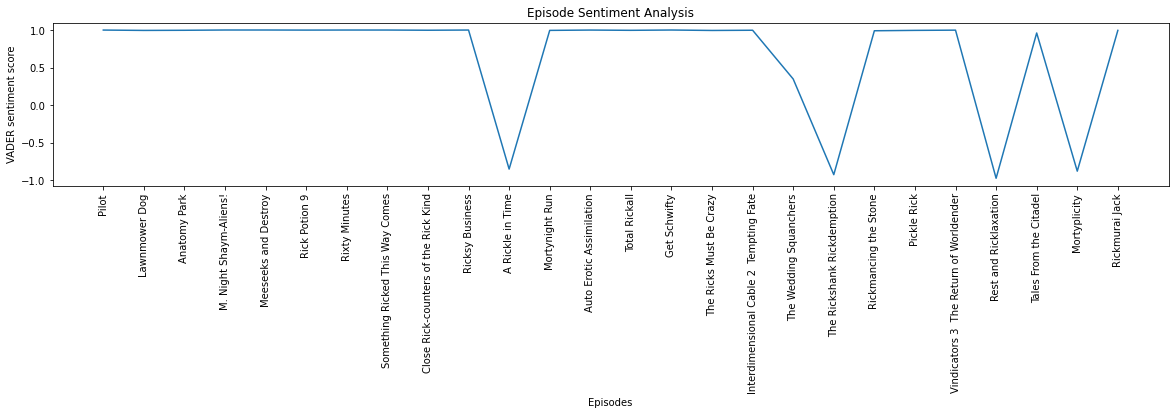

In [16]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_VADER_episodes['episode name'], df_VADER_episodes.VADER_score)
plt.xticks(rotation=90)
plt.title("Episode Sentiment Analysis", )
plt.xlabel("Episodes")
plt.ylabel("VADER sentiment score")
plt.show()

In [17]:
df_ranking_episodes = pd.read_csv('https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/RaM_imdb_episodes_ranking.csv')
df_ranking_episodes

,rank,Title,rate,nb_votes,imdb_link,Season_nb,Episode_nb
0,1,Tales From the Citadel,9.8,29698,https://www.imdb.com/title/tt5218332/,3,7
1,2,The Rickshank Rickdemption,9.6,19948,https://www.imdb.com/title/tt5218228/,3,1
2,3,Total Rickall,9.6,16633,https://www.imdb.com/title/tt4832262/,2,4
3,4,Rickmurai Jack,9.5,8127,https://www.imdb.com/title/tt15041334/,5,10
4,5,The Vat of Acid Episode,9.5,12058,https://www.imdb.com/title/tt10655692/,4,8
5,6,The Wedding Squanchers,9.4,13492,https://www.imdb.com/title/tt4832278/,2,10
6,7,Close Rick-counters of the Rick Kind,9.4,14232,https://www.imdb.com/title/tt3333846/,1,10
7,8,Pickle Rick,9.3,17516,https://www.imdb.com/title/tt5218268/,3,3
8,9,The Ricks Must Be Crazy,9.3,13424,https://www.imdb.com/title/tt4832268/,2,6
9,10,Star Mort Rickturn of the Jerri,9.2,8756,https://www.imdb.com/title/tt10655696/,4,10


In [18]:
df_VADER_episodes = df_VADER_episodes.rename(columns={'episode name': 'Title', 'season no.':'Season_nb', 'episode no.':'Episode_nb'})
#df_sent_episodes = df_VADER_episodes.set_index(['Season_nb', 'Episode_nb']).join(df_ranking_episodes.set_index(['Season_nb', 'Episode_nb']))
df_sent_episodes = df_VADER_episodes.merge(df_ranking_episodes, on=['Season_nb', 'Episode_nb'], how='left')
df_sent_episodes.sort_values(by=['rank'], ascending=False)

,Season_nb,Episode_nb,Title_x,line,NRC_score,VADER_score,rank,Title_y,rate,nb_votes,imdb_link
16,2,8,Interdimensional Cable 2 Tempting Fate,Don't worry Jerry. He's gonna fine.You hear Je...,"[{'positive': 39, 'trust': 37, 'anticipation':...",0.9966,46,Interdimensional Cable 2: Tempting Fate,7.7,11047,https://www.imdb.com/title/tt4832274/
0,1,1,Pilot,Morty! You gotta come on. Jus'... gotta come m...,"[{'fear': 72, 'joy': 79, 'positive': 171, 'sur...",0.9990,43,Pilot,8.0,13483,https://www.imdb.com/title/tt2169080/
19,3,2,Rickmancing the Stone,"Summer, time we're hiding Colorkian echo nest,...","[{'anticipation': 78, 'fear': 84, 'trust': 124...",0.9897,38,Rickmancing the Stone,8.2,11577,https://www.imdb.com/title/tt5218256/
21,3,4,Vindicators 3 The Return of Worldender,"Don't let things away, Morty. If DNA gets Eart...","[{'positive': 166, 'trust': 121, 'joy': 74, 'a...",0.9979,37,Vindicators 3: The Return of Worldender,8.2,11302,https://www.imdb.com/title/tt5218288/
14,2,5,Get Schwifty,"Oh boy. Time go, Morty.,Uhh, where?,The Pentag...","[{'disgust': 42, 'negative': 97, 'anticipation...",0.9996,34,Get Schwifty,8.3,11393,https://www.imdb.com/title/tt4832266/
2,1,3,Anatomy Park,"Last King Christmas arrived!, In Christmas Chr...","[{'positive': 142, 'joy': 77, 'anticipation': ...",0.9961,31,Anatomy Park,8.4,12303,https://www.imdb.com/title/tt3333828/
7,1,9,Something Ricked This Way Comes,"Hey Rick, I project science fair weekend. You ...","[{'positive': 185, 'trust': 123, 'disgust': 65...",0.9993,29,Something Ricked This Way Comes,8.5,11289,https://www.imdb.com/title/tt3333840/
9,1,11,Ricksy Business,"Bye, mom! Bye, dad!,Drive carefully!,Have fun,...","[{'anticipation': 92, 'positive': 161, 'joy': ...",0.9993,28,Ricksy Business,8.5,10960,https://www.imdb.com/title/tt3333854/
12,2,3,Auto Erotic Assimilation,"Love. Connection. Experience.,Yeah Morty, Come...","[{'joy': 73, 'positive': 183, 'anger': 57, 'di...",0.9990,25,Auto Erotic Assimilation,8.6,11446,https://www.imdb.com/title/tt4832260/
1,1,2,Lawnmower Dog,What? Why looking me? You want outside? Outsid...,"[{'anticipation': 57, 'fear': 65, 'joy': 42, '...",0.9943,23,Lawnmower Dog,8.7,13525,https://www.imdb.com/title/tt3333824/
